In [2]:
import theMyFunctions as f
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # typically done at the start of the script
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import seaborn as sns # for visualiation
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Get the data, organize files, data exploration, preprocessing

It is worth staying organized, so here we will specify a file path and import the data. We also clean, seperate, and process the data using a pre_process function. This function will create dummie variables and makesure all columns are matching.

In [276]:
# making a path for data, makes eaier to export
DATA_DIR = os.path.join('.', 'data')

data_paths = {'A': {'train': os.path.join(DATA_DIR, 'dfA.csv'), 
                    'test':  os.path.join(DATA_DIR, 'dfAtest.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'dfB.csv'), 
                    'test':  os.path.join(DATA_DIR, 'dfBtest.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'dfC.csv'), 
                    'test':  os.path.join(DATA_DIR, 'dfCtest.csv')}}

In [366]:
# data exploration, looking at the headers 
a_train.head()

,Unnamed: 0,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,...,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country,count
id,,,,,,,,,,,,,,,,,,,,,
46107,1,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,...,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A,6
82739,2,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,...,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A,3
9646,3,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,...,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A,6
10975,4,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,...,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A,3
16463,5,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,...,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A,5


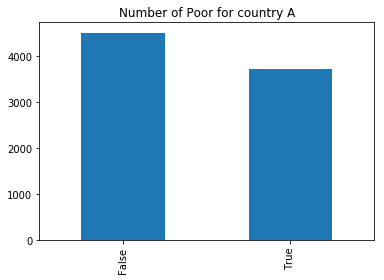

In [368]:
# number of poor and not poor in country A
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

In [369]:
# check data types
a_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 347 entries, Unnamed: 0 to count
dtypes: bool(1), int64(6), object(340)
memory usage: 11.3+ MB


In [277]:
# loading data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

a_test = f.pre_process(a_test, enforce_cols=aX_train.columns, stand = True)
b_test = f.pre_process(b_test, enforce_cols=bX_train.columns, stand = True)
c_test = f.pre_process(c_test, enforce_cols=cX_train.columns, stand = True)




In [365]:
#getting the feature and target data from all dataframes
aX_train = f.pre_process(a_train.drop('poor', axis=1))
ay_train = np.ravel(a_train.poor)

bX_train = f.pre_process(b_train.drop('poor', axis=1))
by_train = np.ravel(b_train.poor)

cX_train = f.pre_process(c_train.drop('poor', axis=1))
cy_train = np.ravel(c_train.poor)

# used for graphing, in visual analysis
ay_train1 = pd.get_dummies(ay_train)


# Modles
## Classifier choice

The Classifiers I used in this assignment are Kneighbors, RandomForest, Decsision Tree, and Neuro Networks. 

__Kneighbors__ seemed reasonable because this data has a notion of distance (we are able to graph data) and can be classified as poor or not poor. This model will look at neighboring data points to determine what class the new datapoint will fall into. 

__Decision Tree model__ is a good model because automatically picked the best features to use as the top nodes; this is valuable because the data is hashed, and it is impossible to identify each dependent variable. Similar to to Rrandom Forest, nolinear relationships between parameters do not effect the performance of the model. 

__Random Forest model__ is used because it deals with unbalanced, missing data. It also has a fast runtime, which is helpful. However, I believe it overfit the data set (perhaps becuase the data set was noisy?).   

__Neural Network__ is used because there was many variables, lots of data, and perhaps lots of noise in the data set. Some inputs also had missing variables. This classifier took a very long time to run, so I used peramater reduction the second time and ran the model. 

# Pipeline

For each model, I used one _run_model()_ function that creates a pipline to do following these steps: 
1. normalizes (scaling) data 
2. Defines a pipeline that pre-processes the model
3. Fits and assess model using grid_search.

This function takes in the model and _param_grid_ as a parameter and returns a _grid_search_. 
The goal is to assess performance of the best model against the dataset through a series of transformations and calculations. 

In [279]:
# creating classifier and param_grid variables to pass into pipeline function
knc = KNeighborsClassifier()
param_grid_knc = {'kneighborsclassifier__n_neighbors': np.arange(1,10)}
rfc = RandomForestClassifier()
param_grid_rfc = {'randomforestclassifier__n_estimators': np.arange(1,10)}
dtc = DecisionTreeClassifier()
param_grid_dtc = {'decisiontreeclassifier__max_depth': np.arange(1,10)}
nn = MLPClassifier() 
param_grid_clf = {'mlpclassifier__hidden_layer_sizes': np.arange(1,12),
                  'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu']}
nn.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

The bellow cells are the four models: Random Forest, Kneighbors, Random Tree, and Neural Networks (with and without parameter reduction)

In [154]:
# Random Forest model
grid_rfc_a = f.run_model(rfc, param_grid_rfc, aX_train, ay_train, do_pca = False)
grid_rfc_b = f.run_model(rfc, param_grid_rfc, bX_train, by_train, do_pca = False)
grid_rfc_c = f.run_model(rfc, param_grid_rfc, cX_train, cy_train, do_pca = False)


In-sample accuracy: 99.33%
In-sample accuracy: 98.03%
In-sample accuracy: 99.69%


In [155]:
# Decision Tree Model
grid_dtc_a = f.run_model(dtc, param_grid_dtc, aX_train, ay_train, do_pca = False)
grid_dtc_b = f.run_model(dtc, param_grid_dtc, bX_train, by_train, do_pca = False)
grid_dtc_c = f.run_model(dtc, param_grid_dtc, cX_train, cy_train, do_pca = False)


In-sample accuracy: 79.92%
In-sample accuracy: 92.29%
In-sample accuracy: 99.66%


In [156]:
#Kneighbors model
grid_knc_a = f.run_model(knc,param_grid_knc, aX_train, ay_train, do_pca = True)
grid_knc_b = f.run_model(knc,param_grid_knc, bX_train, by_train, do_pca = True)
grid_knc_c = f.run_model(knc,param_grid_knc, cX_train, cy_train, do_pca = True)

In-sample accuracy: 100.00%
In-sample accuracy: 92.29%
In-sample accuracy: 98.66%


In [201]:
#Neural Network Model without pca
grid_clf_a = f.run_model(nn,param_grid_clf, aX_train, ay_train, do_pca = True)
grid_clf_b = f.run_model(nn,param_grid_clf, bX_train, by_train, do_pca = True)
grid_clf_c = f.run_model(nn,param_grid_clf, cX_train, cy_train, do_pca = True)

In-sample accuracy: 69.17%


C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\ne

In-sample accuracy: 92.29%


C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In-sample accuracy: 97.45%


# Predictions

Each set of predictions has a confusion matrix visually describing the predicted results to the true results. Ideally, you should be abe to visually see which model makes the best predictions, however, all of the matrix show the same values. This is probably because I used predict() rather than predicit_proba() to construct the matrix; this was done becuase you can't use both binary and continuous data in one matrix.


In [349]:
# random forest predictions
a_preds_rfc = grid_rfc_a.predict_proba(a_test)
b_preds_rfc = grid_rfc_b.predict_proba(b_test)
c_preds_rfc = grid_rfc_c.predict_proba(c_test)

a_preds_rfc1 = grid_rfc_a.predict(aX_train)

a_preds_rfc1_prob = grid_rfc_a.predict_proba(aX_train)

Text(0.5,1,'Random Tree predictions and true poor values')

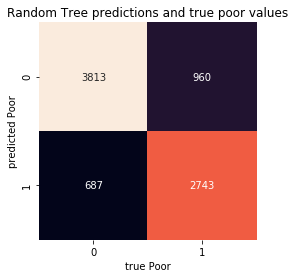

In [322]:
mat_rfc = confusion_matrix(ay_train, a_preds_rfc1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true Poor')
plt.ylabel('predicted Poor')
plt.title('Random Tree predictions and true poor values')

In [359]:
# kneighbors predictions
a_preds_knc = grid_knc_a.predict_proba(a_test)
b_preds_knc = grid_knc_b.predict_proba(b_test)
c_preds_knc = grid_knc_c.predict_proba(c_test)

a_preds_knc1 = grid_knc_a.predict(aX_train)

a_preds_knc1_prop = grid_knc_a.predict_proba(aX_train)

Text(0.5,1,'KNeighbors predictions and true values')

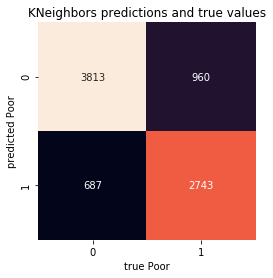

In [360]:
mat_knc = confusion_matrix(ay_train, a_preds_knc1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true Poor')
plt.ylabel('predicted Poor')
plt.title('KNeighbors predictions and true values')

In [361]:
# decision tree classifier predictions
a_preds_dtc = grid_dtc_a.predict_proba(a_test)
b_preds_dtc = grid_dtc_b.predict_proba(b_test)
c_preds_dtc = grid_dtc_c.predict_proba(c_test)

a_preds_dtc1 = grid_dtc_a.predict(aX_train)
a_preds_dtc1_prob = grid_dtc_a.predict_proba(aX_train)

Text(0.5,1,'Decision Tree predictions and true values')

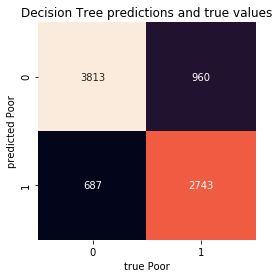

In [362]:
mat_dtc = confusion_matrix(ay_train, a_preds_dtc1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true Poor')
plt.ylabel('predicted Poor')
plt.title('Decision Tree predictions and true values')

In [363]:
# will use Neural network model with pca, because better results for group A
grid_clf_a1 = f.run_model(nn,param_grid_clf, aX_train, ay_train, do_pca = True)
grid_clf_b1 = f.run_model(nn,param_grid_clf, bX_train, by_train, do_pca = True)
grid_clf_c1 = f.run_model(nn,param_grid_clf, cX_train, cy_train, do_pca = True)

In-sample accuracy: 81.65%


C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\maryh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In-sample accuracy: 92.29%


KeyboardInterrupt: 

In [ ]:
# predictions with neural netrwork classifier using pca
a_preds_clf1 = grid_clf_a1.predict_proba(a_test)
b_preds_clf1 = grid_clf_b1.predict_proba(b_test)
c_preds_clf1 = grid_clf_c1.predict_proba(c_test)

a_preds_clf2 = grid_clf_a1.predict(aX_train)
a_preds_clf2_prob = grid_clf_a1.predict_proba(aX_train)

In [ ]:
clf_pred_mat = confusion_matrix(ay_train, a_preds_clf2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true Poor')
plt.ylabel('predicted Poor')
plt.title('Neural Network predictions and true poor values with pca')

In [ ]:
# predictions with neural network classifier not using pca
a_preds_clf = grid_clf_a.predict_proba(a_test)
b_preds_clf = grid_clf_b.predict_proba(b_test)
c_preds_clf = grid_clf_c.predict_proba(c_test)

a_preds_clf3 = grid_clf_a.predict(aX_train)
a_preds_clf3_prob = grid_clf_a.predict_proba(aX_train)

In [ ]:
clf_pred_mat1 = confusion_matrix(ay_train, a_preds_clf3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true Poor')
plt.ylabel('predicted Poor')
plt.title('Neural Network predictions vs true poor values')

# Submission, export CSV

This is where the submission predictions were handeled and the csv is made. I turned in both Neural Networks and Decision Tree; neural networks had a better prediction. 

In [ ]:
# submission predctions
a_sub = f.make_country_sub(a_preds_clf, a_test, 'A')
b_sub = f.make_country_sub(b_preds_clf, b_test, 'B')
c_sub = f.make_country_sub(c_preds_clf, c_test, 'C')

In [ ]:
submission = pd.concat([a_sub, b_sub, c_sub])


In [ ]:
submission.head()

In [ ]:
submission.tail()


In [ ]:
submission.to_csv('submission2.csv')

# Visualizing Results
## Accuracy for each model
The scatter plots bellow show the accuracy for each model. The propability of predictions and results (in as binary values) are shown against eachother in a scatter plot. The model with the best accuracy is the **neural network model** with dimensionality reduction (pca); this is visiually shown in the scatter plot.The least accurate model is **Kneighbors**; this makes sense since it organizes all data into a _true_ or _false_ class, meaning all values are binary reguardless of *predicit_propa()* being used. 

Text(0.5,1,'Neural Networks no pca model preds and true values')

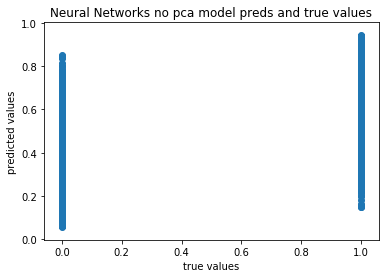

In [370]:
plt.scatter(ay_train1, a_preds_clf3_prob)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title("Neural Networks no pca model preds and true values")


(Text(0.5,1,'random forest model preds and true values'),)

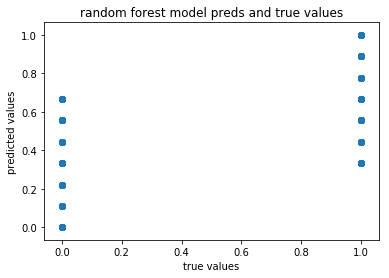

In [371]:
plt.scatter(ay_train1, a_preds_rfc1_prob)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title("random forest model preds and true values"),



Text(0.5,1,'Nueral Network model with pca preds and true values')

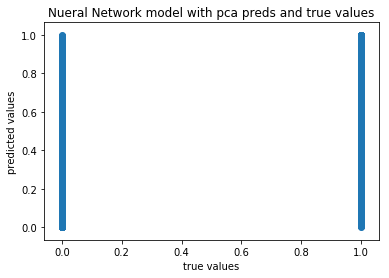

In [372]:
plt.scatter(ay_train1, a_preds_clf2_prob)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title("Nueral Network model with pca preds and true values")

(Text(0.5,1,'Decision Tree model preds and true values'),)

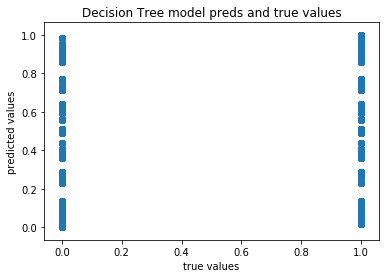

In [373]:
plt.scatter(ay_train1, a_preds_dtc1_prob)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title("Decision Tree model preds and true values"),

Text(0.5,1,'Kneighbors model preds and true values')

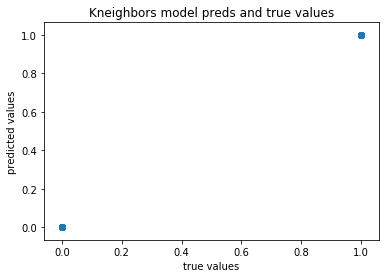

In [364]:
plt.scatter(ay_train1, a_preds_knc1_prop)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title("Kneighbors model preds and true values")

# Parameter performance
This last histagram shows the **neural network** model predictions. This model was run twice, once with all parameters, once with a parameter reduction algorithm. Both resutlts are shown; though all numbers lie between 0 and 1, there is a huge difference in predictions. The predictions from the model _with parameter redcutions_ best matche the true values for poor extracted from the training data. 

In [3]:
bins = np.linspace(0,1)
plt.hist(a_preds_clf3_prob, bins, alpha=0.5, label='no pca reducton')
plt.hist(a_preds_clf2_prob, bins, alpha=0.5, label='pca reduction')
plt.legend(loc='upper right')
plt.show()

NameError: name 'a_preds_clf3_prob' is not defined